# Visualizing decision trees

## Learning Goals

* Be able to visualize a decision tree

We will make a reasonable silly model with the iris dataset, where the goal is to predict species of flower.

In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from IPython.display import SVG
from graphviz import Source

## Load the data and model

In [2]:
iris_data = load_iris()
features = iris_data['data']
target = iris_data['target']

![iris](../Day_2/images/Iris_versicolor_3.jpg)

In [3]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(features, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Visualize the tree

Note that you will need to have `graphviz` installed on your system for this next cell to work. 
* `export_graphviz` outputs a DOT file, which different programs (such as graphviz) can use to generate images of trees. You can specify an `out_file` if you want to generate the DOT file and make the tree image in a different program. At a pinch, you can copy and paste the output into an [online DOT file viewer](http://www.webgraphviz.com/)
* `Source(.....)` takes the DOT file output, and turns it into a graphviz object
* `SVG(....)` takes output and makes an SVG suitable for putting in a browser
* `display(...)` makes a pretty version of the SVG in the notebook.

The point most likely to fail is `Source`. `export_graphviz` should work, and you can copy the output into the [online DOT file viewer](http://www.webgraphviz.com/)

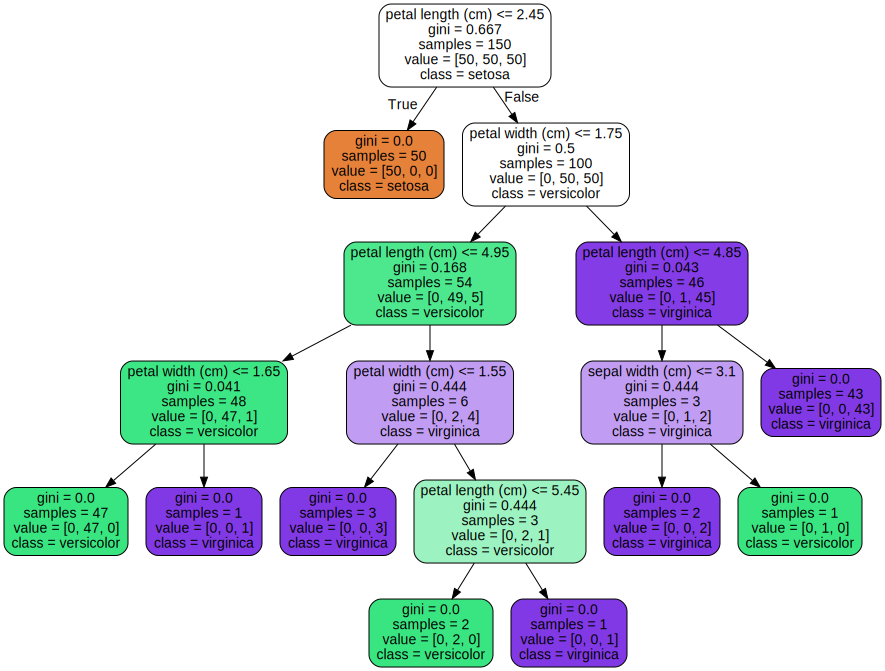

In [4]:
graphviz_object = Source(export_graphviz(decision_tree, out_file=None, 
                                       class_names=iris_data['target_names'],
                                       feature_names=iris_data['feature_names'],
                                       filled=True, rounded=True))
display(SVG(graphviz_object.pipe(format='svg')))

## Note we can limit the output depth:

We can keep the full tree, but only print it out to a certain depth

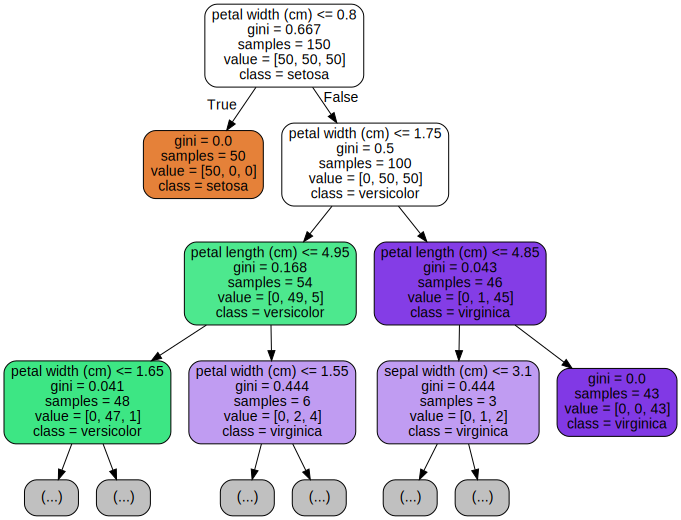

In [5]:
graphviz_object = Source(export_graphviz(decision_tree, out_file=None, 
                                       class_names=iris_data['target_names'],
                                       feature_names=iris_data['feature_names'],
                                       filled=True, rounded=True, max_depth=3))
display(SVG(graphviz_object.pipe(format='svg')))

## Pruning the tree

Let's alter the tree so it has a max depth of 2

In [6]:
decision_tree = DecisionTreeClassifier(max_depth=2).fit(features, target)

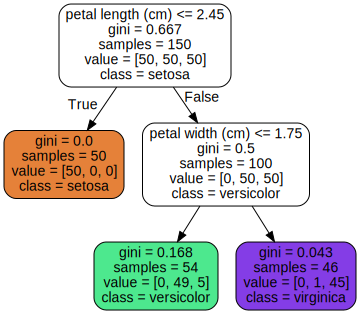

In [7]:
graphviz_object = Source(export_graphviz(decision_tree, out_file=None, 
                                       class_names=iris_data['target_names'],
                                       feature_names=iris_data['feature_names'],
                                       filled=True, rounded=True))
display(SVG(graphviz_object.pipe(format='svg')))